
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">



# <center> **12. AUTOENCODERS** </center>


_Teaching machines to learn for themselves without having to be explicitly told if everything they do is right or wrong — is the key to “true”.  [Yan Lecun, director of AI research]_



## <span style="color:red"> Outline </span> 
1. **Autoencoders: an unsupervised perspective**
2. **Autoecoders from DNN**
3. **Autoecoders from CNN**



In [ ]:
#@title 1. MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2')
print(os.getcwd())

In [ ]:
#@title Load libraries { display-mode: "form" }
#@markdown Here is important to change to GPU  

import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
print(tf.__version__)

# **1. Autoencoders: an unsupervised perspective**

The **autoencoders** learn a data representation from **(encoder)** using **unlabeled data**  for some **(decoder)** application, such as data reduction, abnormal detection, noise reduction, data generation,  among much others. 

<center> 
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/autoencoders.png" style="width:700px;heigth:100px">
</center>

Three main components are identified in autoencoders: 

- **Encoder** $(f(\mathbf{x}))$ works as a classical DNN algorithm that emulate a encoding function to obtain a latten vector. 
- **Latten vector, bottleneck** $(\mathbf{h} = f(\mathbf{x}))$ is a hidden layer that describe in special coding the input, as $\mathbf{h} = \sigma(\mathbf{Wx}+ \mathbf{b})$ 
- **Decoder**, $(r = g(\mathbf{h}))$,   a decoding function to obtain an approximation of $\mathbf{{x}'}$, as $\mathbf{{x}'} = \sigma'(\mathbf{W'h}+ \mathbf{b'})$
- **Loss function** a distance btween compressed and decompressed representation, defined as 
$$\left \| \mathbf{x} -\mathbf{{x}'} \right \|^{2} = \left \| \mathbf{x} - \sigma'(\mathbf{W'(\sigma(\mathbf{Wx}+ \mathbf{b}))}+ \mathbf{b'}) \right \|^{2} $$

Nowadays, these algorithms are developed with deep learning representations, and among the most know application, we can enumerate: 

1. Reduce dimensionality (Like or better than a PCA)
2. To establish hidden vectors (embeddings) to represent complex knowlegde (Like word embeddings) in a lattent space. 
3. To detect anomalies and reduce noise. It allows to work with strongly non-balanced data. 
4. Data visualization





**Go to the action!**



In [ ]:
#@title **code** To preare data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
#prepare data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
#flatten to put into a DNN autoencoder
x_train_flatten = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test_flatten = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
print(x_train_flatten[0].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(784,)


In [ ]:
#@title **code** the most simple autoencoder
encoding_dimension = 32
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dimension, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#@title **code** train and test as usual
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=70,
                batch_size=256, shuffle=True,
                validation_data=(x_test_flatten, x_test_flatten))

In [ ]:
#@title **code** take only the encoded part to return latent vectors

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)


#Decoder
encoded_input = tf.keras.layers.Input(shape=(encoding_dimension,))
decoder_layer = autoencoder.layers[-1]
decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))

print("\n encoder model: encoder \n")
print(encoder.summary())
print(" \n decoder model: decoder \n")
print(decoder.summary())


 encoder model: encoder 

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None
 
 decoder model: decoder 

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
______________________________

In [ ]:
#@title **code** Test images and latent vectors 
encoded_imgs = encoder.predict(x_test_flatten)
predicted = autoencoder.predict(x_test_flatten)
predicted.shape



(10000, 784)

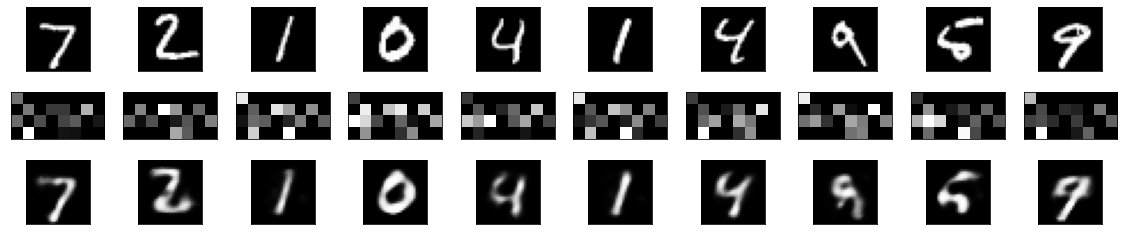

In [ ]:
#@title **code** visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_flatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(4,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

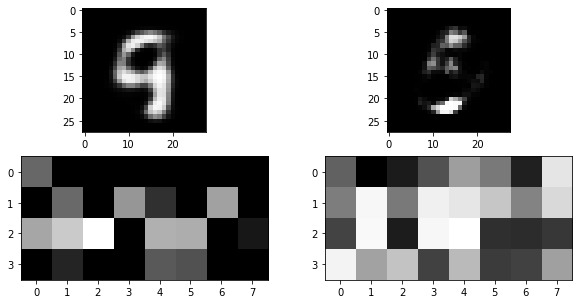

In [ ]:
#@title **code** evaluating random embeding vectors

index_image =  150#@param {type:"integer"}
random_index =  5#@param {type:"number"}


exp_orig = np.expand_dims(encoded_imgs[index_image], axis=0)

random_h = (np.random.random(encoded_imgs[index_image].shape))*random_index
exp_rand = np.expand_dims(random_h, axis=0)

decod_img = decoder.predict(exp_orig)
decod_rnd = decoder.predict(exp_rand)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2, 2, 1)
ax.imshow(decod_img.reshape(28,28))
ax = fig.add_subplot(2, 2, 2)
ax.imshow(decod_rnd.reshape(28,28))
ax = fig.add_subplot(2, 2, 3)
ax.imshow(encoded_imgs[index_image].reshape(4,8))
ax = fig.add_subplot(2, 2, 4)
ax.imshow(random_h.reshape(4,8))



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Test with fashion_mnist dataset
- Change optimizer and evaluate performance
- Now, build a larger DNN with additional hidden layers and report results. 

In [ ]:
#@ title **code student**





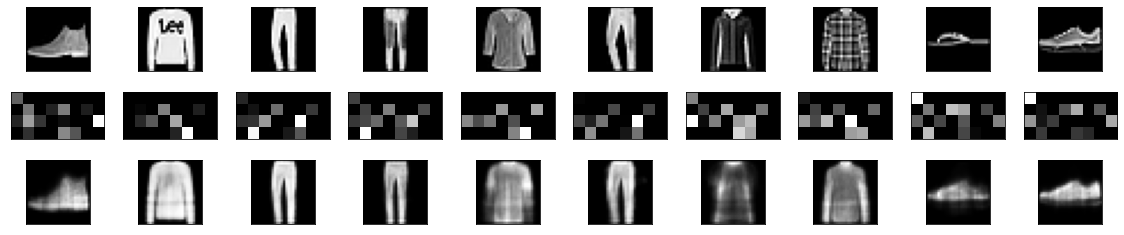

In [ ]:
#@ title **code student ** predict and visualize over fashion





In [ ]:
#@markdown ## **2.1 DEEPLY DNN AUTOENCODERS**
#@markdown **code professor** 

input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(256, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(255, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_16 (Dense)             (None, 255)              

In [ ]:
#@title **code** train and test as usual
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=100,
                batch_size=256, shuffle=True,
                validation_data=(x_test_flatten, x_test_flatten))

In [ ]:
#@title **code** take only the encoded part to return latent vectors

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_test_flatten)
predicted = autoencoder.predict(x_test_flatten)
predicted.shape

(10000, 784)

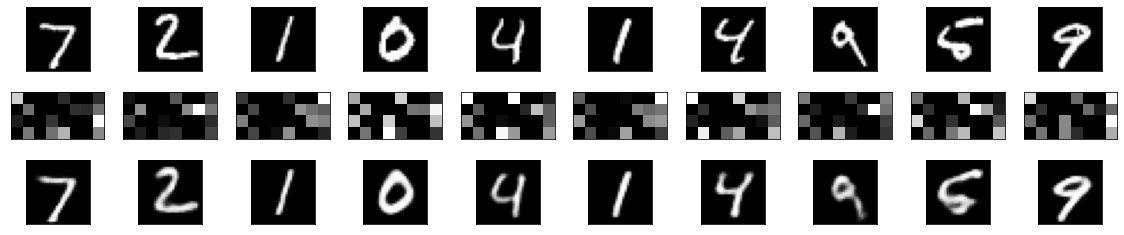

In [ ]:
#@title **code** predict and visualize over fashion
encoded_imgs = encoder.predict(x_test_flatten)
predicted = autoencoder.predict(x_test_flatten)
#@title **code** visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_flatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(4,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### 2.2 **Anomaly detection Autoecoders from DNN**

One of the main tasks solved for autoencoders is the **anomaly detection** that consist on detect **NON-COMMON PATTERNS** from a know distribution of data representation. 

To proof the effectiveness of autoencoders we will to try to solve the problem of detect **FRAUD bank transactions** over an European credit card transaction dataset. The dataset has **284807 normal transactions** and **492 fraudulent transactions** taken from two consecutive days. 

The dataset is available in Kaggle and for confidential concerns, the features were previously mapped to a endoded representation used principal component analysis (PCA). 

**The idea:** is to detect fraud transactions. 

**Go to the action!**



In [ ]:
#@title **code** Load and explore data
import pandas as pd
datos = pd.read_csv("data/creditcard.csv")
print(datos.head())
print("strongly unbalanced dataset!")
nr_classes = datos['Class'].value_counts(sort=True)

print(nr_classes)

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]
strongly unbalanced dataset!
0    284315
1       492
Name: Class, dtype: int64


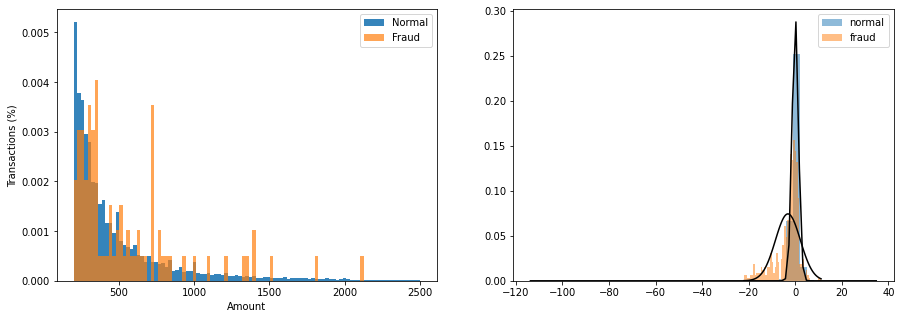

In [ ]:
#@title **code** **It is a really complex problem!**
#@markdown Transaction distribution and feature distribution among classes

#@markdown Features among V1-V28
feature = "V5" #@param {type:"string"}

import scipy.stats as stats


normal_v = datos[feature][datos.Class == 0]
fraud_v  = datos[feature][datos.Class == 1]
d_normal = stats.norm(loc=np.mean(normal_v), scale=np.std(normal_v))
d_fraud = stats.norm(loc=np.mean(fraud_v), scale=np.std(fraud_v))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)

bins = np.linspace(200, 2500, 100)
ax = plt.hist(datos[datos.Class == 0].Amount, bins, density=True, alpha=0.9,  label='Normal')
ax = plt.hist(datos[datos.Class == 1].Amount, bins, density=True,alpha=0.7,  label='Fraud')
ax = plt.legend(loc='upper right')
ax = plt.xlabel("Amount")
ax = plt.ylabel("Transactions (%)");

ax = fig.add_subplot(1, 2, 2)
ax = plt.hist(normal_v, bins=50, density=True, alpha=.5, label="normal");
ax = plt.hist(fraud_v, bins=50, density=True, alpha=.5, label="fraud");
t_normal = np.linspace(np.min(normal_v), np.max(normal_v), 100)
t_fraud = np.linspace(np.min(fraud_v), np.max(fraud_v), 100)
ax = plt.plot(t_normal, d_normal.pdf(t_normal), c='black')
ax = plt.plot(t_fraud, d_fraud.pdf(t_fraud), c='black')
ax = plt.legend(loc='upper right')

In [ ]:
#@title **code** We prepare the dataset
#@markdown we remove non important columns
#@markdown and normalize "amount" to be in same range than PCA features

from sklearn.preprocessing import StandardScaler
datos.drop(['Time'], axis=1, inplace=True)
datos['Amount'] = StandardScaler().fit_transform(datos['Amount'].values.reshape(-1,1))

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(datos, test_size=0.2, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
X_train = X_train.values

Y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_test = X_test.values
print(X_train.shape, X_test.shape, Y_test.shape)

(227451, 29) (56962, 29) (56962,)


In [ ]:
#@title **code** Only train normal transaction! 

#@markdown the autoencoder learn only conventional things and
#@markdown  will generate alarms for abnormal transactions

#@markdown Now, we train the abnormal detection autoencoder

dim_entrada = X_train.shape[1]         
input_layer = tf.keras.layers.Input(shape=(dim_entrada,))

encoder = tf.keras.layers.Dense(20, activation='tanh')(input_layer)
encoder = tf.keras.layers.Dense(14, activation='relu')(encoder)

decoder = tf.keras.layers.Dense(20, activation='tanh')(encoder)
decoder = tf.keras.layers.Dense(29, activation='relu')(decoder)


autoencoder_ad = tf.keras.models.Model(inputs=input_layer, outputs=decoder)

from keras.optimizers import SGD
sgd = tf.optimizers.SGD(lr=0.01)
autoencoder_ad.compile(optimizer=sgd, loss='mse')

autoencoder_ad.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test,X_test), verbose=1)



In [ ]:
#@title **code** save and load according your work

autoencoder_ad.save('models/mymodel.h5')
#autoencoder_ad = tf.keras.models.load_model('models/autoendoder_ad_100.h5')
autoencoder_ad.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
dense (Dense)                (None, 20)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 14)                294       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 29)                609       
Total params: 1,803
Trainable params: 1,803
Non-trainable params: 0
_________________________________________________________________


### **Precision vs Recall**

Because we have **unbalanced data** and we focus on detect **fraud** transaction, we need to categorize fraud and normal transactions, as: 

- **_TP_**: fraud detected as fraud
- **_TN_**: normal detected as normal
- **_FN_**: fraud detected as normal
- **_FP_**: normal detected as fraud

Then, metrics that five more information are: 

- **Precision:** ($\frac{TP}{TP+ FP}$)  proportion of correct fraud detections w.r.t all fraud detections. In other terms, this measure estimates the probability that a randomly sample will be relevant (TP)


- **Recall:** ($\frac{TP}{TP+ FN}$)  the proportion of correct fraud detections with respect all fraud samples. In other terms, this measure the estimated proability that a random sample will be properly selected. 

[from wiki]

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Precisionrecall.png" style="width:700px;heigth:100px">

Now, to apply in our problem we need: 

1. predict values
2. compute error with real values
3. threshold with respect to reconstruction
4. define if it is fraud. 

In [ ]:
#@title **code** predict fraud and normal transactions for test
X_pred = autoencoder_ad.predict(X_test)
ecm = np.mean(np.power(X_test-X_pred,2), axis=1)
print(X_pred.shape)

(56962, 29)


If we pass a fraud transaction the reconstruction will be bad or almost worse than a reconstruction from a conventional transaction. 

(48367,)


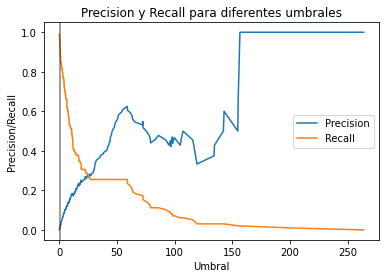

[[48512  8352]
 [    8    90]]
90
Precision:  0.010660980810234541
Recall:  0.9183673469387755


In [ ]:
#@title **code** we can plot P&R to decide the threshold
threshold_pr = 0.71 #@param {type:"slider", min:0, max:250, step:0.01}




from sklearn.metrics import confusion_matrix, precision_recall_curve
precision, recall, umbral = precision_recall_curve(Y_test, ecm)

print(umbral.shape)
plt.plot(umbral, precision[1:], label="Precision")
plt.plot(umbral, recall[1:], label="Recall")
plt.axvline(threshold_pr, color="black", alpha=0.5)
plt.title('Precision y Recall para diferentes umbrales')
plt.xlabel('Umbral')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()


threshold_fix = threshold_pr
Y_pred = [1 if e > threshold_fix else 0 for e in ecm]

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

print(conf_matrix[1][1])

Prec =  conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[0][1])
Rec = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])

print("Precision: ", Prec)
print("Recall: ", Rec)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Change optimizer and architecture. It is better with some other configuration?

- Evaluate the performance with a model saved in course with 100 epochs. 

-  Create a decoder model and pass random latent vectors. How robust is the proposed approach?


# **3. Autoecoders from CNN**

We can take advantaje of convolutions to obtiane more robust representation on image data. In this case we use as usual `Conv2D`, `MaxPooling2D`. We can also use dropout and the other tricks to obtain a representation. 

- Regaring decoder, we use the `UpSampling2D` layer that is. 

In [ ]:
#@title **code** To preare data for CNN
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
#prepare data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train_d = np.expand_dims(x_train, axis=3)
x_test_d = np.expand_dims(x_test, axis=3)
print("one sample: ", x_train_d[0].shape)
print(x_train_d.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
one sample:  (28, 28, 1)
(60000, 28, 28, 1)


In [ ]:
#@title **code** autoencoder CNN implementation

input_img = tf.keras.layers.Input(shape=(28, 28, 1) ) 
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x) #  (4, 4, 8)  128-dimensional

#@markdown it is a 128 dimensional de hidden emebdding vector

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_cnn = tf.keras.models.Model(input_img, decoded)

autoencoder_cnn.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)         

In [ ]:
#@title **code** train and test as usual
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder_cnn.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder_cnn.fit(x_train_d, x_train_d, epochs=100,
                batch_size=256, shuffle=True,
                validation_data=(x_test_d, x_test_d))

In [ ]:
#@title **code** take only the encoded part to return latent vectors


# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_test_d)
predicted = autoencoder_cnn.predict(x_test_d)
predicted.shape

(10000, 28, 28, 1)

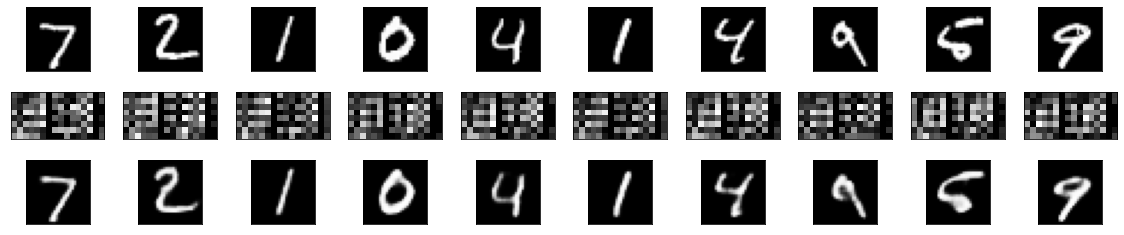

In [ ]:
#@title **code professor** predict and visualize over fashion

#@title **code** visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,16))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

-  Try a CNN autoencoder for cifar-10
-  Ilustrate the obtained results



In [ ]:
#@title **code student** CIFAR 10
#@markdown uses batchnormalization



print ("CIFAR 10")
print (x_train_cf.shape, y_train_cf.shape, x_test_cf.shape, y_test_cf.shape)



In [ ]:
#@title **code** train and test as usual
opt = tf.optimizers.Adam()
autoencoder_cnn.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder_cnn.fit(x_train_cf, x_train_cf, epochs=100,
                batch_size=32, shuffle=True)

In [ ]:
#@title **code** take only the encoded part to return latent vectors


# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = autoencoder_cnn.predict(x_test_cf)
predicted = autoencoder_cnn.predict(x_test_cf)
predicted.shape

(10000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


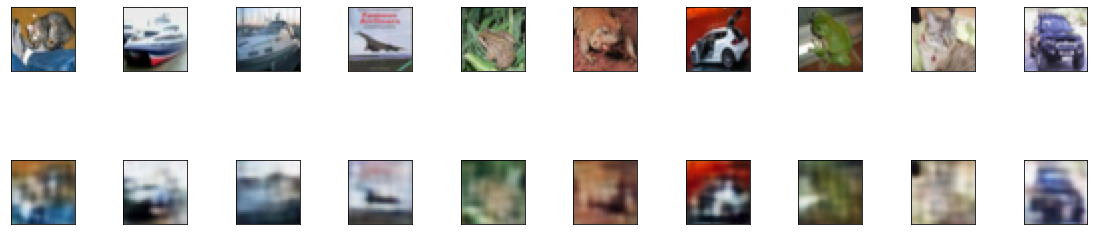

In [ ]:
#@ title **code student** predict and visualize over cifar

#@title **code** visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_cf[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



#### **3.1 Noise reduction**

From convolutional autoencoders arise novel applications such as noise reduction, coloring images and much others. In such case, we need to form pair of images during training. 
- In the input of the autoencoder is presented the **raw image** (noisy, gray, high-resolution, other semantic concepts)
- In the output of the autoencoder is presented **the expected image**. 



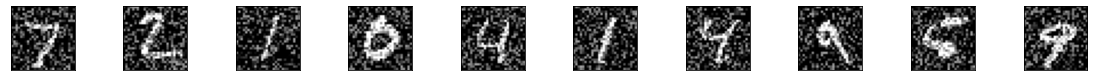

In [ ]:
#@title **code** Create noise dataset 
noise_factor =  1.3#@param {type:"number"}

x_train_noisy = x_train_d + (np.random.random(x_train_d.shape)-0.5)*noise_factor
x_test_noisy = x_test_d + (np.random.random(x_test_d.shape)-0.5)*noise_factor

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

plt.figure(figsize=(40, 4))
for i in range(10):
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
#@title **code** Pay attention on train input output
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder_cnn.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder_cnn.fit(x_train_noisy, x_train_d,  epochs=100,
                batch_size=256, shuffle=True, 
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)])

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_test_noisy)
predicted = autoencoder_cnn.predict(x_test_noisy)
predicted.shape

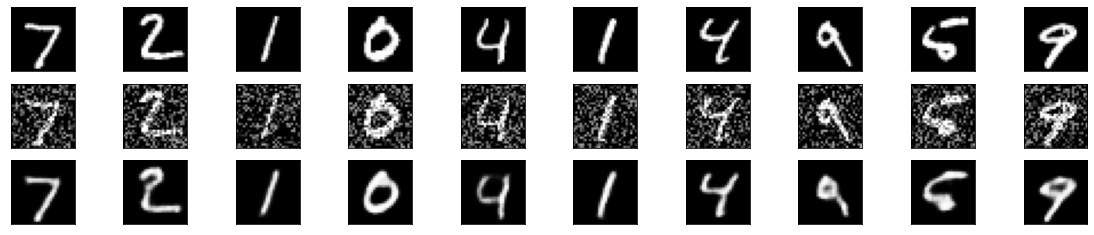

In [ ]:
#@title **code** predict and visualize over fashion

#@title **code** visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

-  Now, create a white noise (learned from nomal distribution) with mean zero and variance one. This noise is additive. 
- **Optional** : Try a CNN autoencoder for cifar-10. Add new layers to support a better representation. 


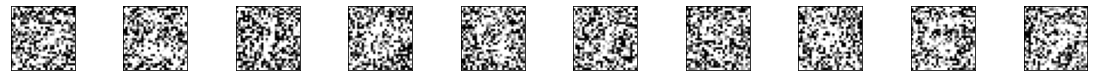

In [ ]:
#@ title **code student** generate white noise
noise_factor = 0.7






plt.figure(figsize=(40, 4))
for i in range(10):
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">
 
- Now rotate the iamges X degrees  and try to recover original numbers. 
  - You can play by adding a random rotation to be more challenge for autoencoder.
- Taller 3. Implement a colorization autoencoder. 

(60000, 28, 28, 1) (60000, 28, 28, 1)
(10000, 28, 28, 1) (10000, 28, 28, 1)


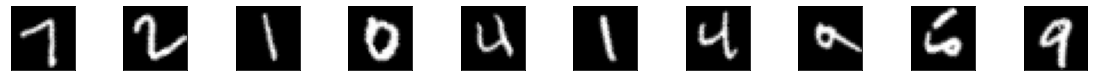

In [ ]:
#@ title **code student**  rotate images
from skimage.transform import rotate


degree = 30 #@param {type:"number"}







plt.figure(figsize=(40, 4))
for i in range(10):
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_rot[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
#@title **code** Pay attention on train input output
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder_cnn.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder_cnn.fit( x_train_rot, x_train_d, epochs=150,
                batch_size=256, shuffle=True, 
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)])

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_train_rot)
predicted = autoencoder_cnn.predict(x_train_rot)
predicted.shape

In [ ]:
#@ title **code student** predict and visualize over fashion

#@title **code** visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    # display original
    plt.imshow(x_test_rot[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## **Some conclusions**

- The autoencoders represent a unsupervised way to tacke many different problems such as noise reduction, abnormal detection, among much others. 

- Today, there exist many other variants such variational autoencoders, generative models among others. 

- A main feature of autoencoders is the hidden vector representation, which among others allows to show structure of data in a latent space. 



## **References**


[1. Reducing the dimensionality of data with neural networks](https://dbirman.github.io/learn/hierarchy/pdfs/Hinton2006.pdf)

[2. Autoencoders from deeplearningbook](https://www.deeplearningbook.org/contents/autoencoders.html)




<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">